In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.spatial import ConvexHull
import pickle as pkl

%matplotlib notebook

In [121]:
# # # Generate random dots
# # dots = np.random.rand(3, 10) * 100 # Shape ndot * ndim

# with open('X_C_I_list.pkl', 'rb') as handle:
#     X_C_I_list = pkl.load(handle)
    
# X_list = X_C_I_list[0]

# X = np.vstack(X_list).squeeze(axis = 2).T


# X.shape

In [122]:
# READ SPECIFIC X ARRAY

with open('X_clean_array_3.pkl', 'rb') as handle:
    X = pkl.load(handle)

X = X.T

X.shape

(3, 4879)

### Convex Mesh

In [123]:
# Function for plotting the convex of 
def convex_mesh(dots):
    
    # compute the convex hull of the points
    cvx = ConvexHull(dots.T)

    # cvx.simplices contains an (nfacets, 3) array specifying the indices of the vertices for each simplical facet
    tri = Triangulation(dots[0], dots[1], triangles=cvx.simplices)

    # Visualization
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.plot_trisurf(tri, dots[2]) # Plot the triangle
    ax.scatter(*dots, color='r') # plot all the dots

    plt.draw()
    
    return tri

<IPython.core.display.Javascript object>


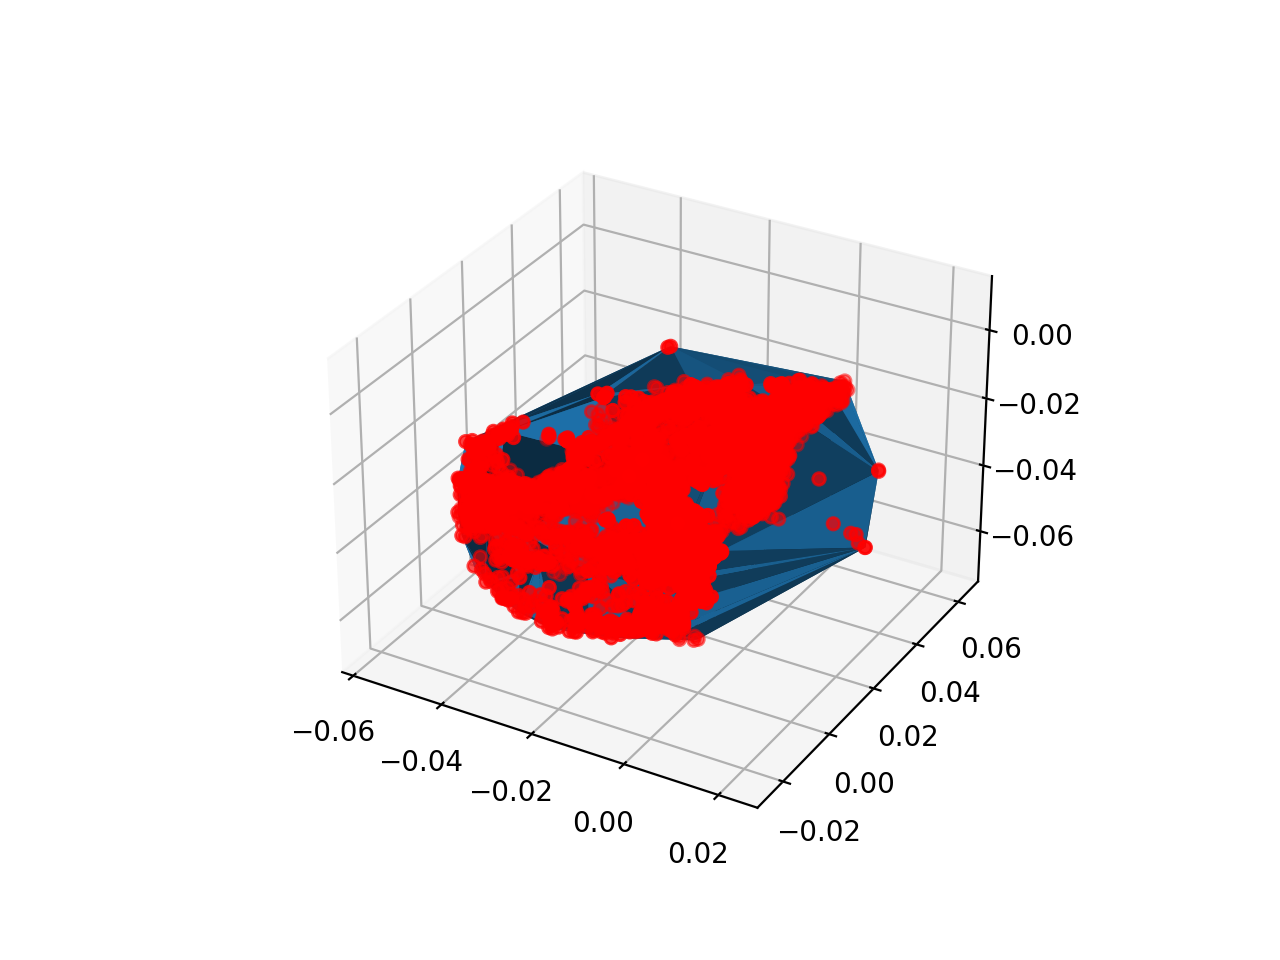

/var/folders/f7/7wm8ypsx1_zcy_df6_f5nrl40000gn/T/ipykernel_55598/2294203077.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [124]:
tri = convex_mesh(X)

### Concave Mesh

In [125]:
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [129]:
def concave_mesh(dots, alpha = None):
    
    if not alpha:
        # Alpha control how concave the graph is 
        alpha = 0.95 * alphashape.optimizealpha(dots) 
        
    # Create a concave hull
    alpha_shape = alphashape.alphashape(dots, alpha)
    
    # Visualization
    #alpha_shape.show()
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
    ax.scatter(*dots.T, color='r') # plot all the dotss
    plt.show()
    
    return alpha_shape.vertices, alpha_shape.faces
    

<IPython.core.display.Javascript object>


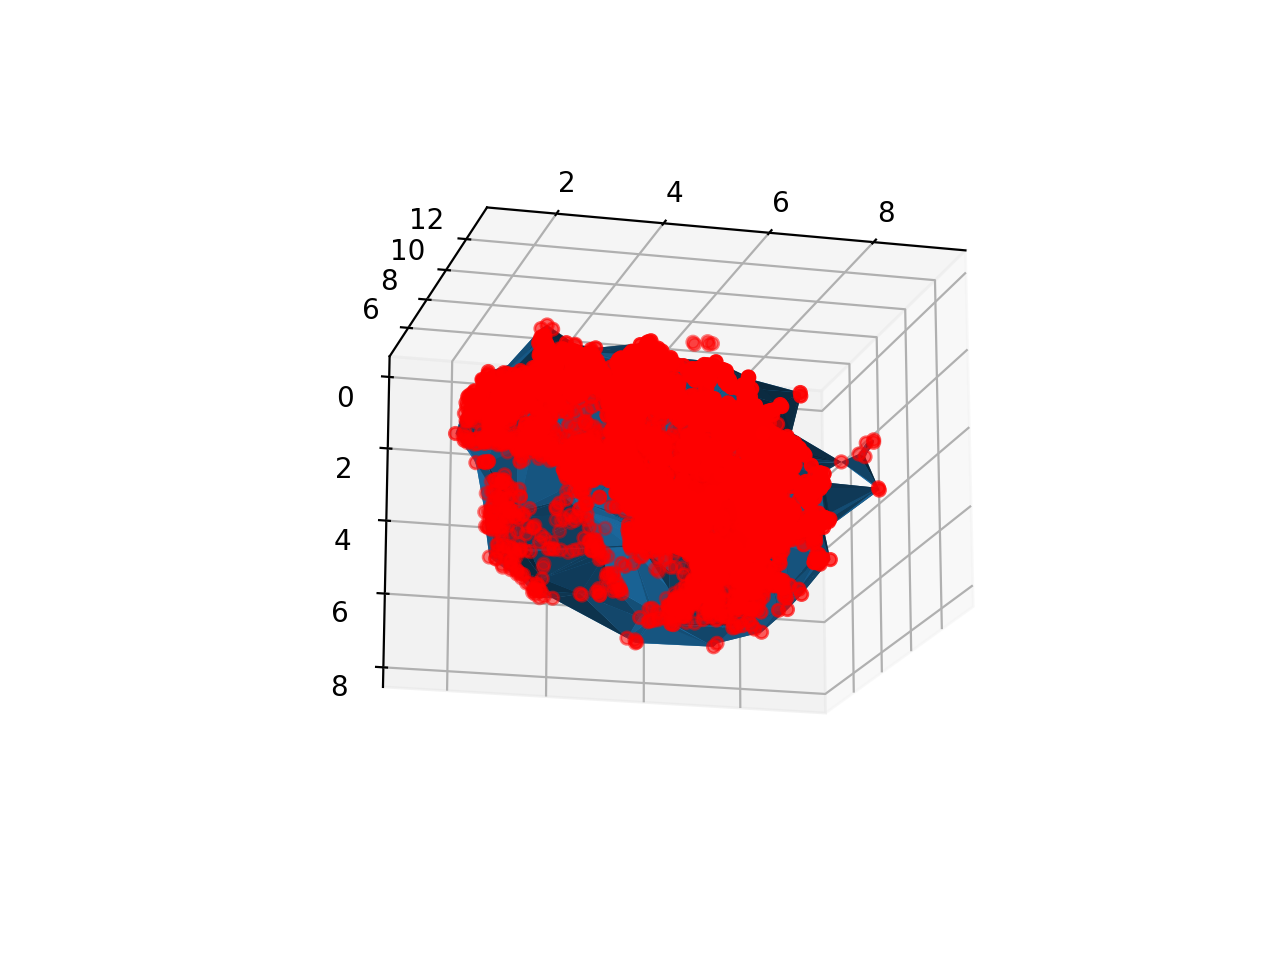

In [130]:
%matplotlib notebook

X_sampled = X#[:,0:100]
X_sampled -= np.min(X_sampled)
X_sampled = X_sampled * 100
vertices, faces = concave_mesh(X_sampled.T, alpha = 1)

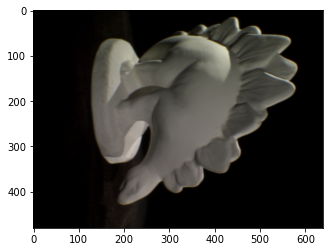

In [108]:
%matplotlib inline

import matplotlib.image as image


im = image.imread('dinoRing/dinoR0001.png')

plt.imshow(im)
plt.show()